# Final Capstone Project:
## Can you predict the price using images of the house?
## Data Wrangling/EDA Notebook 1: accompanying csv file

In [1]:
# import packages
import PIL
from PIL import Image
import os
import glob
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cwd = os.getcwd() 
print(cwd)

/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles


In [3]:
file = 'austinHousingData.csv'
df = pd.read_csv(file)
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [10]:
# The column #46 'homeImage' is the name of the image file... this will be important 
# as it is how the image files are named.

#Column #18 is 'latestPrice'

### Explore the features

In [5]:
df['city'].unique()
df['city'].value_counts()

austin              15020
del valle              86
pflugerville           36
driftwood              12
manor                   6
dripping springs        5
manchaca                3
west lake hills         2
road                    1
Name: city, dtype: int64

In [6]:
df['homeType'].value_counts()

Single Family            14241
Condo                      470
Townhouse                  174
Multiple Occupancy          96
Vacant Land                 83
Apartment                   37
Residential                 37
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: homeType, dtype: int64

In [ ]:
# take away: some of the homes are not listed as in Austin.
# some of the homes are not single-family, while most are.

In [14]:
df['numOfBedrooms'].value_counts()


3     7440
4     5190
5     1171
2     1064
6      128
1       98
0       47
8       18
7       13
20       1
10       1
Name: numOfBedrooms, dtype: int64

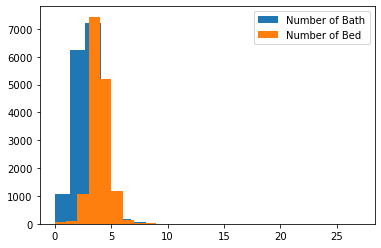

In [15]:
plt.hist(df['numOfBathrooms'], bins=20)
plt.hist(df['numOfBedrooms'], bins = 20)
plt.legend(['Number of Bath', 'Number of Bed'])
plt.show()

In [ ]:
# most of the homes have normal distributed data for number of bedrooms and bathrooms. 

count     15171.000000
mean       2208.323314
std        1378.576119
min         300.000000
25%        1483.000000
50%        1975.000000
75%        2687.000000
max      109292.000000
Name: livingAreaSqFt, dtype: float64


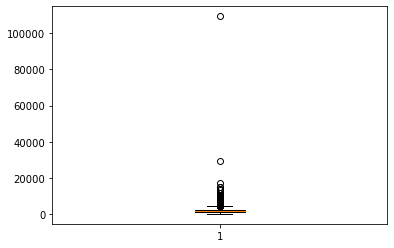

In [16]:
print(df['livingAreaSqFt'].describe())
plt.boxplot(df['livingAreaSqFt'])
plt.show()

In [17]:
df['latestPrice'].describe().astype(int)

count       15171
mean       512767
std        453185
min          5500
25%        309000
50%        405000
75%        575000
max      13500000
Name: latestPrice, dtype: int64

In [ ]:
# avg price: ~500K  (the stdev is 4.5K !!!)
# cheapest: 5.5K
# most expensive: 13.5M !!!


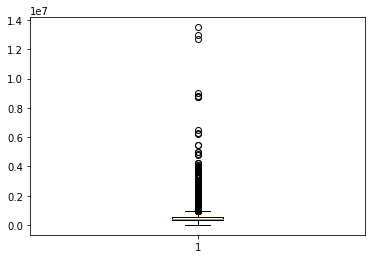

In [18]:
plt.boxplot(df['latestPrice'])
plt.show()

In [19]:
df['latestPrice'].value_counts()

325000.0    202
450000.0    189
375000.0    182
350000.0    179
425000.0    177
           ... 
218500.0      1
309285.0      1
179750.0      1
716861.0      1
614500.0      1
Name: latestPrice, Length: 2365, dtype: int64

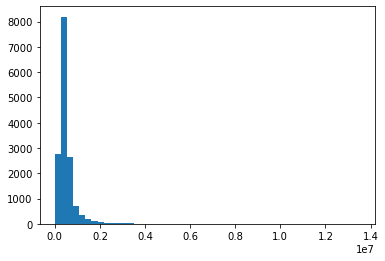

In [20]:
plt.hist(df['latestPrice'], bins=50)
plt.show()

In [21]:

# Should get all values that are below 1000000 as these could be errors (based on the histogram)
len(df[df['latestPrice']<1000000])


14218

### feature correlations

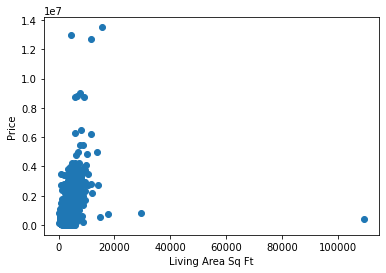

In [22]:
plt.scatter(df['livingAreaSqFt'],df['latestPrice'])
plt.xlabel('Living Area Sq Ft')
plt.ylabel('Price')
plt.show()

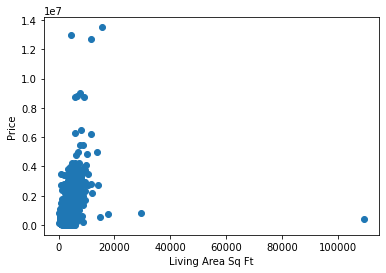

In [23]:
plt.scatter(df['livingAreaSqFt'],df['latestPrice'])
plt.xlabel('Living Area Sq Ft')
plt.ylabel('Price')
plt.show()

<AxesSubplot:>

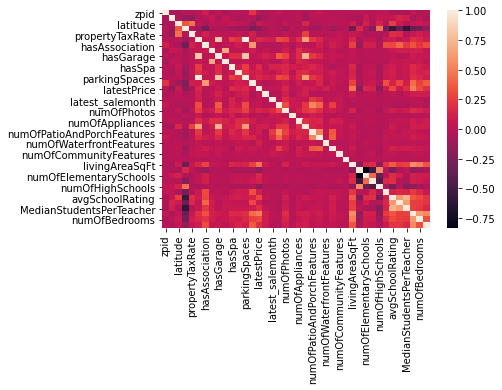

In [24]:
import seaborn as sns
sns.heatmap(df.corr())

In [25]:
new_df = df[['latestPrice','homeImage']]
new_df.head()

,latestPrice,homeImage
0,305000.0,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,295000.0,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,256125.0,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,240000.0,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,239900.0,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   latestPrice  15171 non-null  float64
 1   homeImage    15171 non-null  object 
dtypes: float64(1), object(1)
memory usage: 237.2+ KB


In [27]:
new_df.rename(columns= 
              {'latestPrice':'Price', 'homeImage':'Image Name'}, inplace=True)
new_df.head()

/Users/sangeetajayakar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Price,Image Name
0,305000.0,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,295000.0,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,256125.0,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,240000.0,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,239900.0,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       15171 non-null  float64
 1   Image Name  15171 non-null  object 
dtypes: float64(1), object(1)
memory usage: 237.2+ KB


#### The final cleaned dataframe can be exported to a new csv file. 

In [30]:
# output this new csv file 
#path_to_folder = '/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles'
#new_file_name = 'cleaned_AH_data.csv'
new_df.to_csv(r'/Users/sangeetajayakar/Springboard_Course/AustinHousingFiles/cleaned_AH_data.csv')



notes on this section:
original dateframe has no null values. 